In [187]:
#Importing the libraries
import numpy as np
import pandas as ps
import seaborn as ss
import matplotlib.pyplot as pt
%matplotlib inline

#Setting Pandas varibales
ps.set_option("display.max_columns",None)
ps.set_option("display.max_rows",None)

#Setting for displaying 2 decimal places
ps.options.display.float_format = '{:.2f}'.format

#Ignore warning
import warnings as warn
warn.filterwarnings('ignore')

## Data Sourcing

In [14]:
#Import the file or data
filePath = "C:\\Users\\Pankaj patil\\Documents\\Machine_Learning_&_AI\\Exploratory_Data_Analysis\\Case_Study\\loan.csv"
loan_df = ps.read_csv(filePath)
loan_df.head(2)

C:\Users\Pankaj patil\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [188]:
#Check the dataset for the size, number of rows and columns, missing values.
print(loan_df.shape)

#Running the below method causes the machine to go in IDEAL mode.
loan_df.info

#Lets try another way for checking missing values
loan_df.isnull().sum()

(39717, 26)


id                        0
member_id                 0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
url                       0
purpose                   0
title                    11
zip_code                  0
addr_state                0
dti                       0
pub_rec_bankruptcies    697
issue_m                   0
emp_length_cat            0
dtype: int64

## Data Cleaning

In [16]:
#Data Cleaning
#Drop the columns having NULL values
loan_df.dropna(axis=1, how='all',inplace=True)

In [17]:
#Check the data again
loan_df.shape

(39717, 57)

In [18]:
#Data Cleaning
#Lets drop the columns which focuses on customer behaviour since we are intended to do the Diagnostic analysis we dnt need those columns
loan_df.drop(labels=['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'], axis=1, inplace=True)

In [19]:
#Lets now look at the data again
loan_df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,initial_list_status,next_pymnt_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,NaN,NaN,f,NaN,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,NaN,NaN,f,NaN,0.0,1,0,0.0,0,0.0,0.0


In [20]:
#After checking dataset again we found policy code, payment_plan,mths_since_last_delinq, mthns_since_last_record, initial_list_status, next_pymnt_d,collection_12_mths_ex_med,chargeoff_within_12_mths,delinq_amnt,desc,acc_now_delinq, tax_liens
loan_df.tax_liens.value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [21]:
#Data Cleaning
loan_df.drop(labels=['policy_code','pymnt_plan','mths_since_last_delinq','mths_since_last_record','initial_list_status','next_pymnt_d','collections_12_mths_ex_med','chargeoff_within_12_mths','delinq_amnt','desc','acc_now_delinq','tax_liens'], axis=1, inplace=True)

In [23]:
#Data Checking
print(loan_df.shape)
loan_df.head(2)

(39717, 24)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0.0


## Data Analysis

In [349]:
#Check with the missing values after removing the unnecessary columns and data
loan_df.isnull().sum()

id                        0
member_id                 0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
url                       0
purpose                   0
title                    11
zip_code                  0
addr_state                0
dti                       0
pub_rec_bankruptcies    654
issue_m                   0
emp_length_cat            0
loan_amnt_category        0
dtype: int64

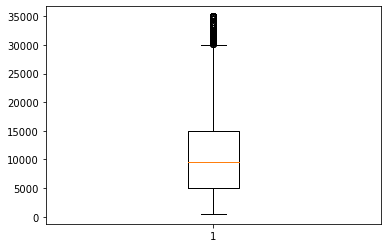

In [350]:
#Chrcking the loan Amount variation
pt.boxplot(loan_df.loan_amnt)
pt.show()

In [26]:
#Handling Missing Values for Emp_title
loan_df.emp_title.fillna("Not Available", inplace=True)

In [27]:
#Lets check for emp_length
loan_df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [67]:
#Handling dats for accurate anaylysis based on Data Defination
loan_df.emp_length.replace(to_replace="< 1 year", value="0 year", inplace=True)

#Extracting numbers using regex
loan_df.emp_length = loan_df.emp_length.str.extract("(\d+)")

#Filling Missing value
mean_val = round(loan_df[~loan_df.emp_length.isnull()].emp_length.astype('int32').mean())
loan_df.emp_length.fillna(mean_val, inplace=True)

#Change the column datatype
loan_df.emp_length = loan_df.emp_length.astype('int32')

In [68]:
loan_df.emp_length.value_counts()

10    8879
0     4583
2     4388
5     4357
3     4095
4     3436
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [75]:
#Interest Rate Column Rectification
#Removing special character
loan_df.int_rate = loan_df.int_rate.str.rstrip("%")

In [159]:
#Updating the datatype of column interest rate.
loan_df.int_rate = loan_df.int_rate.astype('float32')

In [347]:
#Describing int_rate
loan_df.int_rate.describe()

count   37305.00
mean       11.96
std         3.69
min         5.42
25%         8.94
50%        11.83
75%        14.42
max        24.40
Name: int_rate, dtype: float64

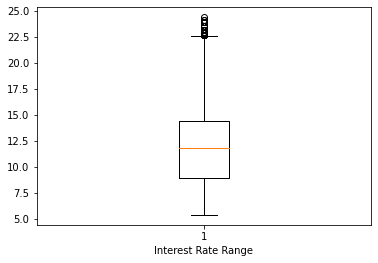

In [408]:
pt.boxplot(loan_df.int_rate)
pt.xlabel("Interest Rate Range")
pt.show()

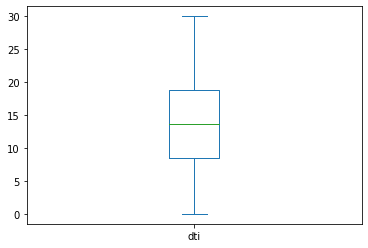

In [440]:
loan_df.dti.plot.box()
pt.show()

In [76]:
loan_df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Not Available,10,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0.0


In [78]:
#Deriving Issue month column
loan_df["issue_m"] = loan_df.issue_d.apply(lambda x : x[:-3])

In [224]:
#Checking the data
loan_df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_m,emp_length_cat,loan_amnt_category
0,1077501,1296599,5000,5000,4975.00,36 months,10.65,162.87,B,B2,Not Available,10,RENT,24000.00,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0.00,Dec,8-10,0-5000
1,1077430,1314167,2500,2500,2500.00,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0.00,Dec,0-2,0-5000


In [226]:
loan_df.annual_inc.describe()

count     39717.00
mean      68968.93
std       63793.77
min        4000.00
25%       40404.00
50%       59000.00
75%       82300.00
max     6000000.00
Name: annual_inc, dtype: float64

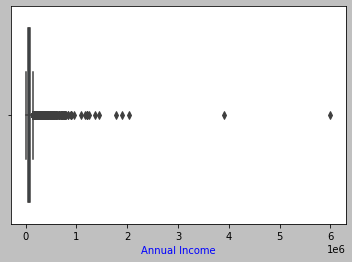

In [230]:
pt.figure(facecolor='silver')
ss.boxplot(data=loan_df, x=loan_df.annual_inc)
pt.xlabel("Annual Income", color='b', fontsize=10)
pt.show()
#by looking at the boxplot of annual income, we can see there are outliers present.

In [236]:
#Remove Outliers
loan_df = loan_df[loan_df.annual_inc < loan_df.annual_inc.quantile(0.97)]

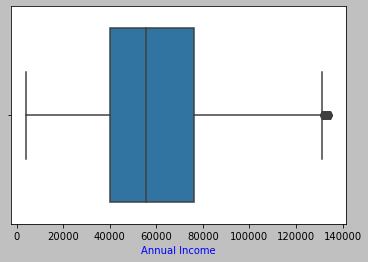

In [441]:
#Post outlier removal
pt.figure(facecolor='silver')
ss.boxplot(data=loan_df, x=loan_df.annual_inc)
pt.xlabel("Annual Income", color='b', fontsize=10)
pt.show()

In [ ]:
loan_df.head()

## Univariate Analysis

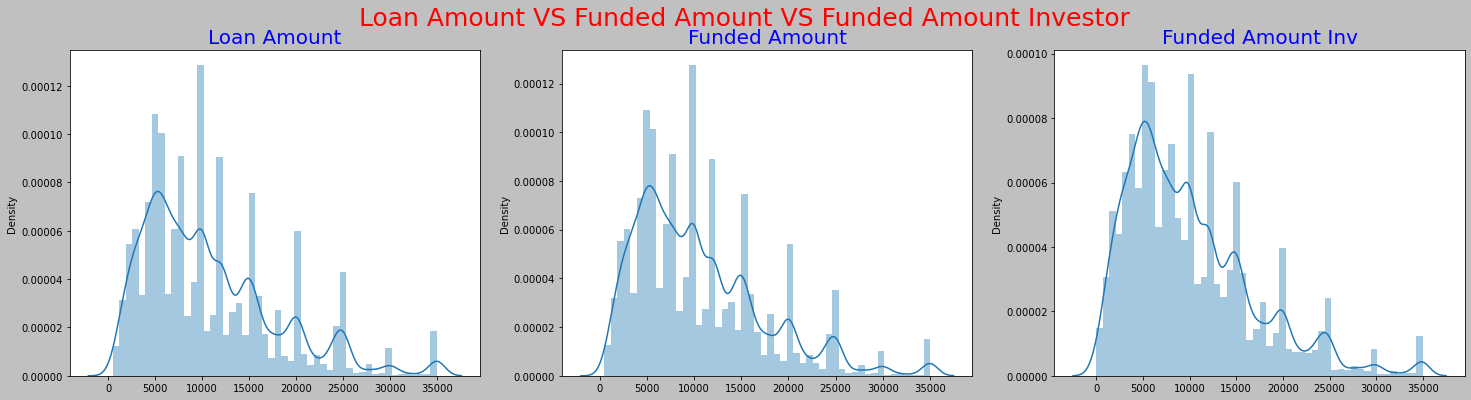

In [346]:
#Quantitative Variables
#Comparison Loan Amount, Funded Amount and Funded Amount by Investor 
fig, ax = pt.subplots(1,3, figsize=(25,6), facecolor='silver')
pt.suptitle("Loan Amount VS Funded Amount VS Funded Amount Investor", fontsize=25, color='r',fontweight=20)

#Setting title of every axes
ax[0].set_title("Loan Amount", color='b', fontsize=20)
ax[1].set_title("Funded Amount", color='b', fontsize=20)
ax[2].set_title("Funded Amount Inv", color='b', fontsize=20)

#Plotting data for each subplot
ss.distplot(ax=ax[0], x=loan_df.loan_amnt)
ss.distplot(ax=ax[1], x=loan_df.funded_amnt)
ss.distplot(ax=ax[2], x=loan_df.funded_amnt_inv)
pt.show()

#Desc
#We are doing the comparison of three amount so that we can find how these variable are varying from each other. From the below 
#graph it looks like the 3 variables almost flows the same pattern where we can say the most of the amount falls from  5K to 15K
#in all the three visuals, so if we focus on one variable that will be also give the close analysis for other variables too since all 
#of them follows the same pattern.

In [368]:
#Derived Metric/ Column
#Bins for Loan Amount
bins = [0,            5000,        10000,            15000,           20000,           25000,            30000,35000]
labels =['0 - 5K', '5K - 10K', '10K - 15K', '15K - 20K', '20K - 25K', '25K - 30K', '30K - 35K']
loan_df["loan_amnt_category"] = ps.cut(loan_df.loan_amnt, bins=bins, labels=labels)

#We are already getting the glimps of loan amount variation from the above visual, the purpose of deriving the categorical varibale is to get a clear picture on Loan Amount distribution.
#deriving the categorical varibale from the quantative/continous variable so that we could also utilize this categorical 
#varibale to show the stakeholders or lender how the loan amount is given and which amount is frequently given to the borrower.
#Apart from this, we would or any other new comer might have a quick look on the dataset on how the loan amount is varying on the data.

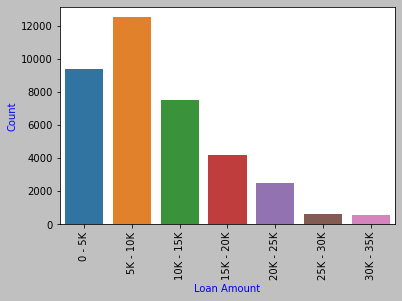

In [369]:
#Countplot for Loan Amount
pt.figure(facecolor='silver')
ss.countplot(data=loan_df, x=loan_df.loan_amnt_category)
pt.xlabel("Loan Amount",color='b', fontsize=10)
pt.ylabel("Count",color='b', fontsize=10)
pt.xticks(rotation=90)
pt.show()

#After forming the categorical varibale and showing the same on the plot we are getting the clear picture that most of the 
#loan amount is in 5k to 10k  and then 0-5K is the second most.

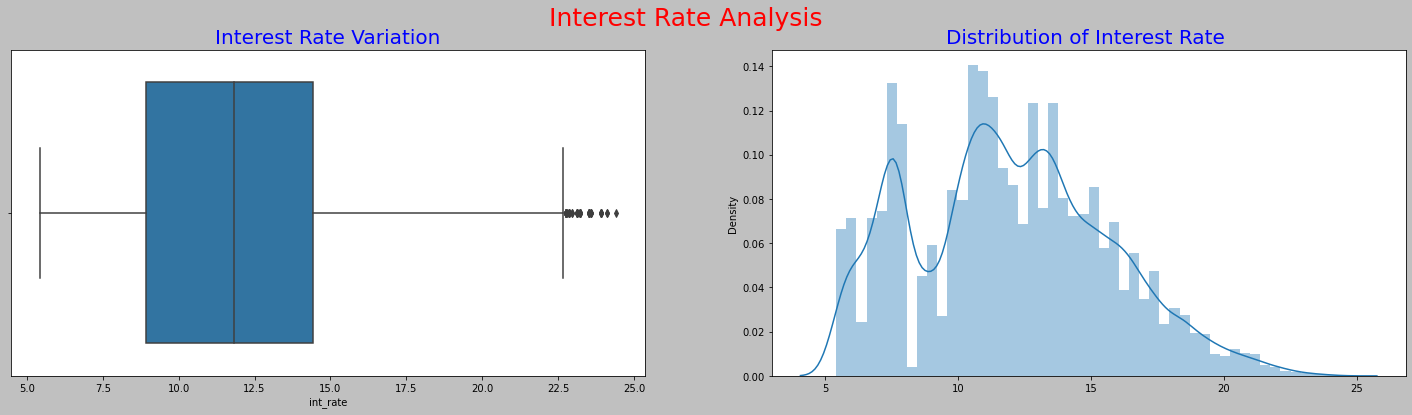

In [379]:
#Quantative Variable
#Box plot and histogram
fig, ax = pt.subplots(1,2, figsize=(25,6), facecolor='silver')
pt.suptitle("Interest Rate Analysis", fontsize=25, color='r',fontweight=20)

#Setting title of every axes
ax[0].set_title("Interest Rate Variation", color='b', fontsize=20)
ax[1].set_title("Distribution of Interest Rate ", color='b', fontsize=20)

#Plotting data for each subplot
ss.boxplot(ax=ax[0], x=loan_df.int_rate)
ss.distplot(ax=ax[1], x=loan_df.int_rate)

pt.show()

#As we are in Univariate Analysis phase, we aleady took a look at one of the quantative varibale that is loan amount, lets take
#a look at the values of interest rate, after plotting the below box plot and the histogram we could say the most interest rate
#varies from approx 9 to 15 and post that it is declining as per the kde and the graph frequencies.

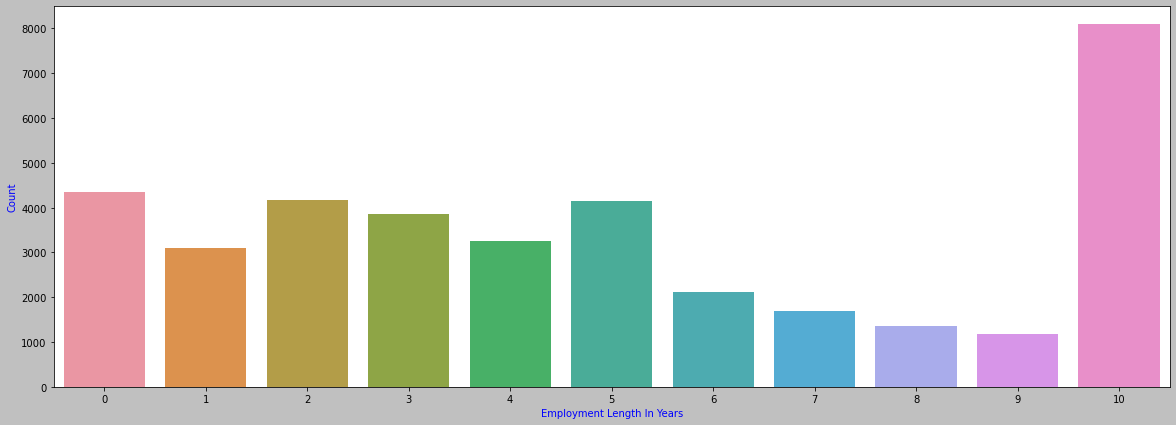

In [375]:
pt.figure(facecolor='silver', figsize=(20,7))
ss.countplot(data=loan_df, x=loan_df.emp_length)
pt.xlabel("Employment Length (In Years)",color='b', fontsize=10)
pt.ylabel("Count",color='b', fontsize=10)
pt.show()

#Below is the distribution of the employment length varibale, form which we can see the 10+ years employment length are more as 
#compared to other variables and there employment length 5 is the average years of the overall emp_length.  


In [450]:
#For creating bins, we can check the range for and decide the bin range.
loan_df.emp_length.describe()

#This is also a quantitative variable, we wont me having much of the provision to display the info on visual, so creating a bins 
#for this seems better idea to me, doing so we'll have data in short and simple way  

count   37305.00
mean        4.92
std         3.50
min         0.00
25%         2.00
50%         4.00
75%         8.00
max        10.00
Name: emp_length, dtype: float64

In [183]:
#Derived Metric/ Column
#Creating bins for emp_length
bins = [-1, 2, 4, 6, 8, 10]
labels =['0-2', '2-4', '4-6', '6-8', '8-10']
loan_df["emp_length_cat"] = ps.cut(loan_df.emp_length, bins=bins, labels=labels)

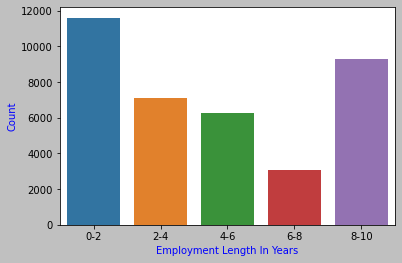

In [260]:
#Barchart for emp_length_category
pt.figure(facecolor='silver')
ss.countplot(data=loan_df, x=loan_df.emp_length_cat)
pt.xlabel("Employment Length In Years",color='b', fontsize=10)
pt.ylabel("Count",color='b', fontsize=10)
pt.show()

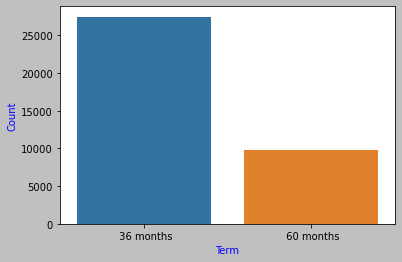

In [442]:
#Ordered Categorical variable
pt.figure(facecolor='silver')
ss.countplot(data=loan_df, x=loan_df.term)
pt.xlabel("Term",color='b', fontsize=10)
pt.ylabel("Count",color='b', fontsize=10)
pt.show()

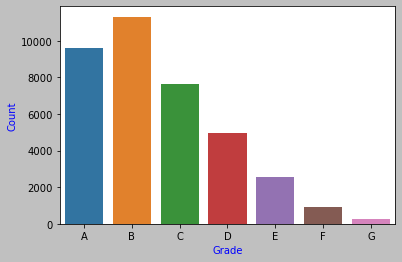

In [447]:
#Ordered Categorical variable
pt.figure(facecolor='silver')
ss.countplot(data=loan_df, x=loan_df.grade, order='ABCDEFG')
pt.xlabel("Grade",color='b', fontsize=10)
pt.ylabel("Count",color='b', fontsize=10)
pt.show()

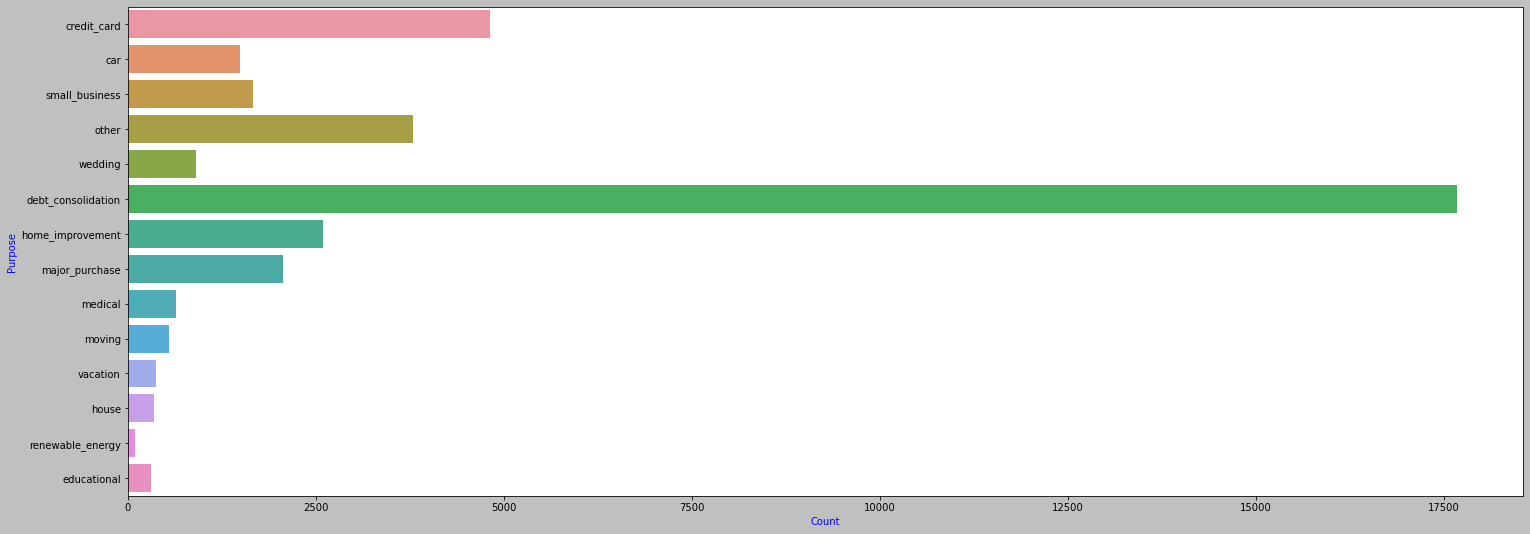

In [380]:
#Unordered categorical
pt.figure(facecolor='silver', figsize=(25,9))
ss.countplot(data=loan_df, y=loan_df.purpose)
pt.xlabel("Count",color='b', fontsize=10)
pt.ylabel("Purpose",color='b', fontsize=10)
pt.show()

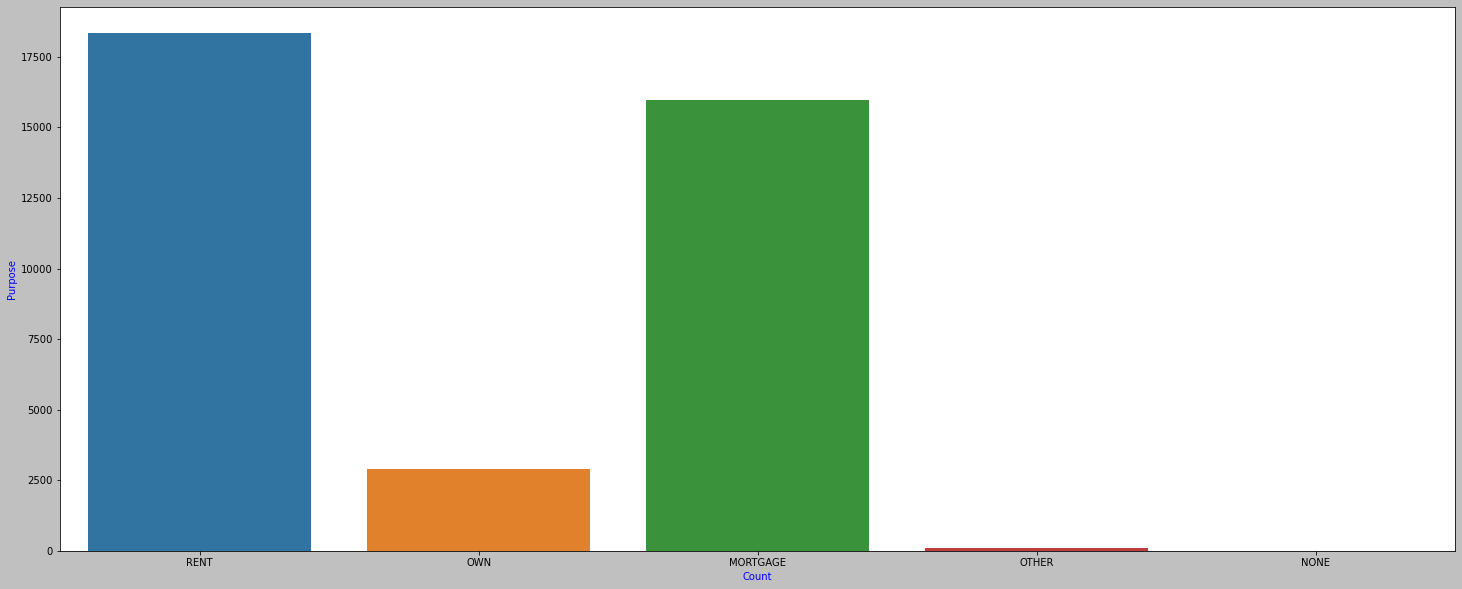

In [451]:
#Unordered variable
pt.figure(facecolor='silver', figsize=(25,10))
ss.countplot(data=loan_df, x=loan_df.home_ownership)
pt.xlabel("Count",color='b', fontsize=10)
pt.ylabel("Purpose",color='b', fontsize=10)
pt.show()

## Bivariate Analysis

In [429]:
loan_df.dti.describe()
#loan_df.head()

count   37305.00
mean       13.51
std         6.67
min         0.00
25%         8.42
50%        13.67
75%        18.78
max        29.99
Name: dti, dtype: float64

In [420]:
#Derived Metric/ Column
#Categorical column for annual income.
#Was finding difficult to load the numeric values so instead of all value the binning gives the clearer picture.

ann_bins = [0,20000,40000,60000,80000,100000,120000,140000]
ann_labels=['0 - 20K','20K - 40K', '40K - 60K','60K - 80K', '80K - 100K', '100K - 120K', '120K +']

loan_df["annual_income_category"] = ps.cut(loan_df.annual_inc,bins=ann_bins, labels=ann_labels)

In [455]:
loan_df.dti.describe()

count   37305.00
mean       13.51
std         6.67
min         0.00
25%         8.42
50%        13.67
75%        18.78
max        29.99
Name: dti, dtype: float64

In [459]:
#Binning for DTI category
loan_df["dti_category"] = ps.cut(loan_df.dti, [0,5,10,15,20,25,30],labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

In [463]:
#Checking the bins created for DTI
loan_df.dti_category.value_counts()

10-15    9303
15-20    8728
5-10     7313
20-25    6649
0-5      4473
25-30     664
Name: dti_category, dtype: int64

In [426]:
#Fully Paid dataframe
paid_df = loan_df[loan_df.loan_status == 'Fully Paid']

#Charged Off dataframe
chargedOff_df = loan_df[loan_df.loan_status == 'Charged Off'] 

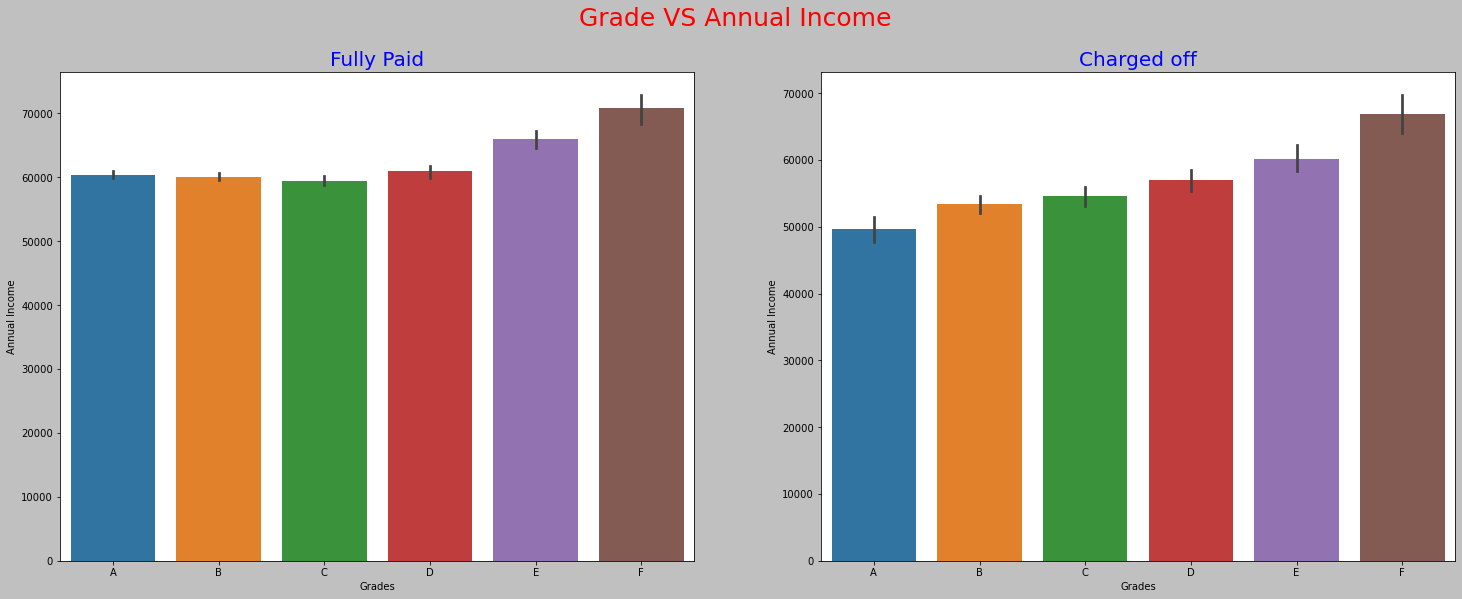

In [253]:
fig, ax = pt.subplots(1,2, figsize=(25,9), facecolor='silver')
pt.suptitle("Grade VS Annual Income", fontsize=25, color='r',fontweight=20)

#Setting title of every axes
ax[0].set_title("Fully Paid", color='b', fontsize=20)
ax[1].set_title("Charged off", color='b', fontsize=20)


#Plotting data for each subplot
g1 = ss.barplot(ax=ax[0], x=paid_df.grade, y=paid_df.annual_inc, order = ['A','B','C','D','E','F'])
g1.set_xlabel("Grades", fontsize=10)
g1.set_ylabel("Annual Income", fontsize=10)

g2 = ss.barplot(ax=ax[1], x=chargedOff_df.grade, y=chargedOff_df.annual_inc, order = ['A','B','C','D','E','F'])
g2.set_xlabel("Grades", fontsize=10)
g2.set_ylabel("Annual Income", fontsize=10)

pt.show()

#Below visual shows two categories in which Fully Paid visual has Annual income higher as compared to Charged Off in terms of Grades
#which shows the borrowers who has lesser income are likely to get charged off

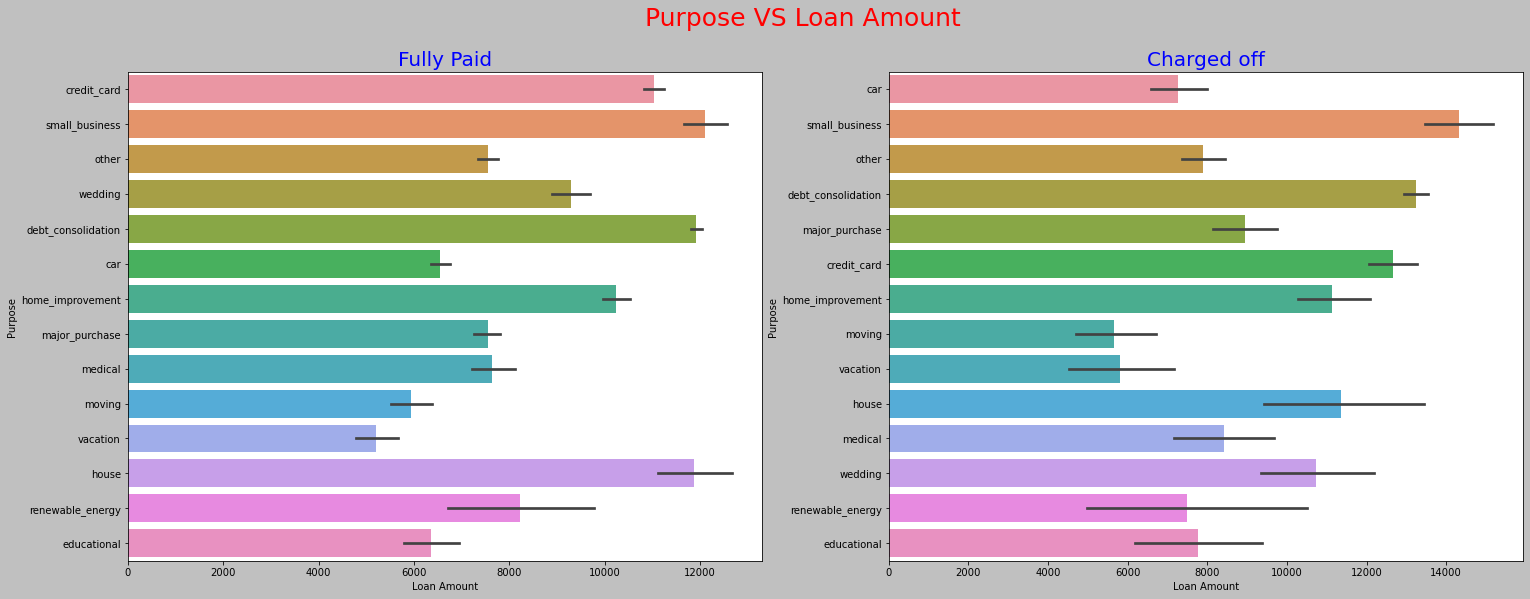

In [452]:
fig, ax = pt.subplots(1,2, figsize=(25,9), facecolor='silver')
pt.suptitle("Purpose VS Loan Amount", fontsize=25, color='r',fontweight=20)

#Setting title of every axes
ax[0].set_title("Fully Paid", color='b', fontsize=20)
ax[1].set_title("Charged off", color='b', fontsize=20)


#Plotting data for each subplot
g1 = ss.barplot(ax=ax[0], y=paid_df.purpose, x=paid_df.loan_amnt)
g1.set_xlabel("Loan Amount", fontsize=10)
g1.set_ylabel("Purpose", fontsize=10)

g2 = ss.barplot(ax=ax[1], y=chargedOff_df.purpose, x=chargedOff_df.loan_amnt)
g2.set_xlabel("Loan Amount", fontsize=10)
g2.set_ylabel("Purpose", fontsize=10)

pt.show()

#From the below graphs it has been seen the loan amount sanctioned for small business, debt_consolidation, house, credit card bills
#are higher in charged off catgeory so we have handcore data in our hand which is stating such category's borrower are likely
#to get charged off.   

#Recommendation would, if the purpose of the loan is any one of the above catgeory, then the loan should be sanctioned to only
#those borrower who has annual income higher, lesser or average DTI percentage, should have OWN or atleast RENT home ownership.

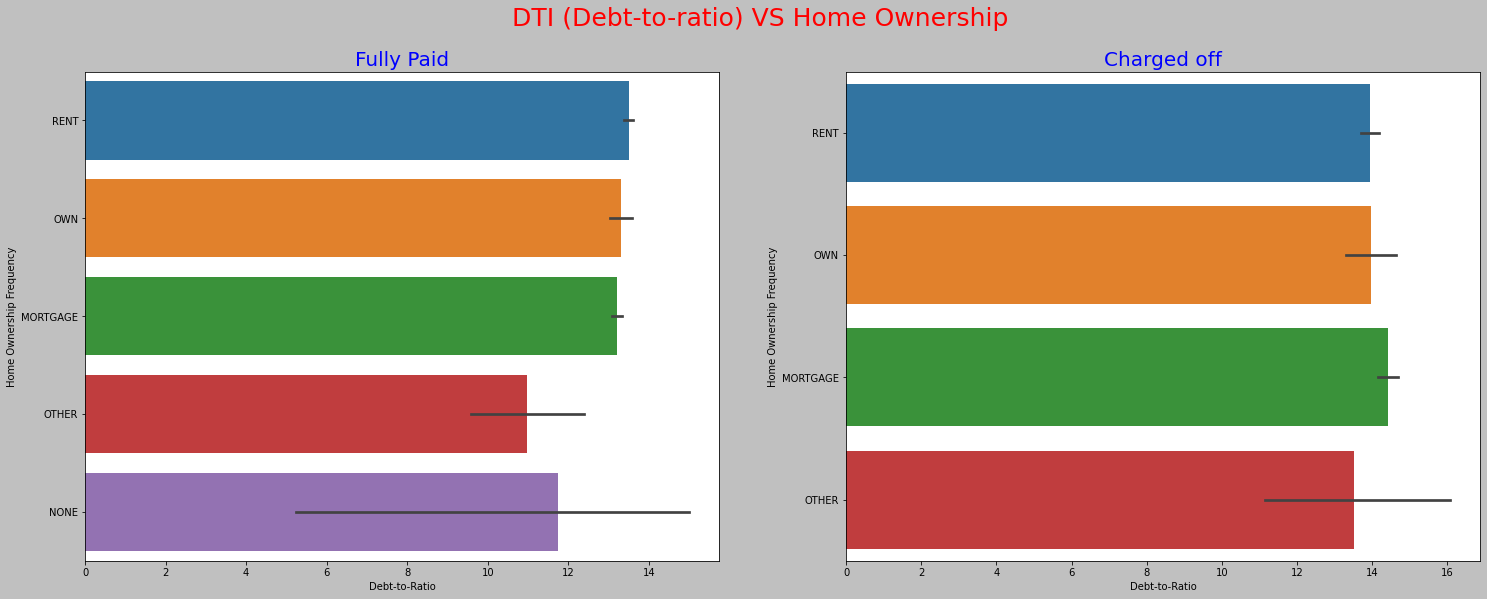

In [453]:
fig, ax = pt.subplots(1,2, figsize=(25,9), facecolor='silver')
pt.suptitle("DTI (Debt-to-ratio) VS Home Ownership", fontsize=25, color='r',fontweight=20)

#Setting title of every axes
ax[0].set_title("Fully Paid", color='b', fontsize=20)
ax[1].set_title("Charged off", color='b', fontsize=20)


#Plotting data for each subplot
g1 = ss.barplot(ax=ax[0], x=paid_df.dti, y=paid_df.home_ownership, estimator=np.mean)
g1.set_xlabel("Debt-to-Ratio", fontsize=10)
g1.set_ylabel("Home Ownership Frequency", fontsize=10)

g2 = ss.barplot(ax=ax[1], x=chargedOff_df.dti, y=chargedOff_df.home_ownership, estimator=np.mean)
g2.set_xlabel("Debt-to-Ratio", fontsize=10)
g2.set_ylabel("Home Ownership Frequency", fontsize=10)

pt.show()

#The comparison of DTI and Home Ownership gives as the data that on the charged off category we have increase in DTI rate in each
#category which states the higher the DTI higher the chances of getting defaulter. As DTI is the component which is based on the
#monthly income and the monthly debt it has to be as much as low. The lesser the DTI, more the trust for lending loan.

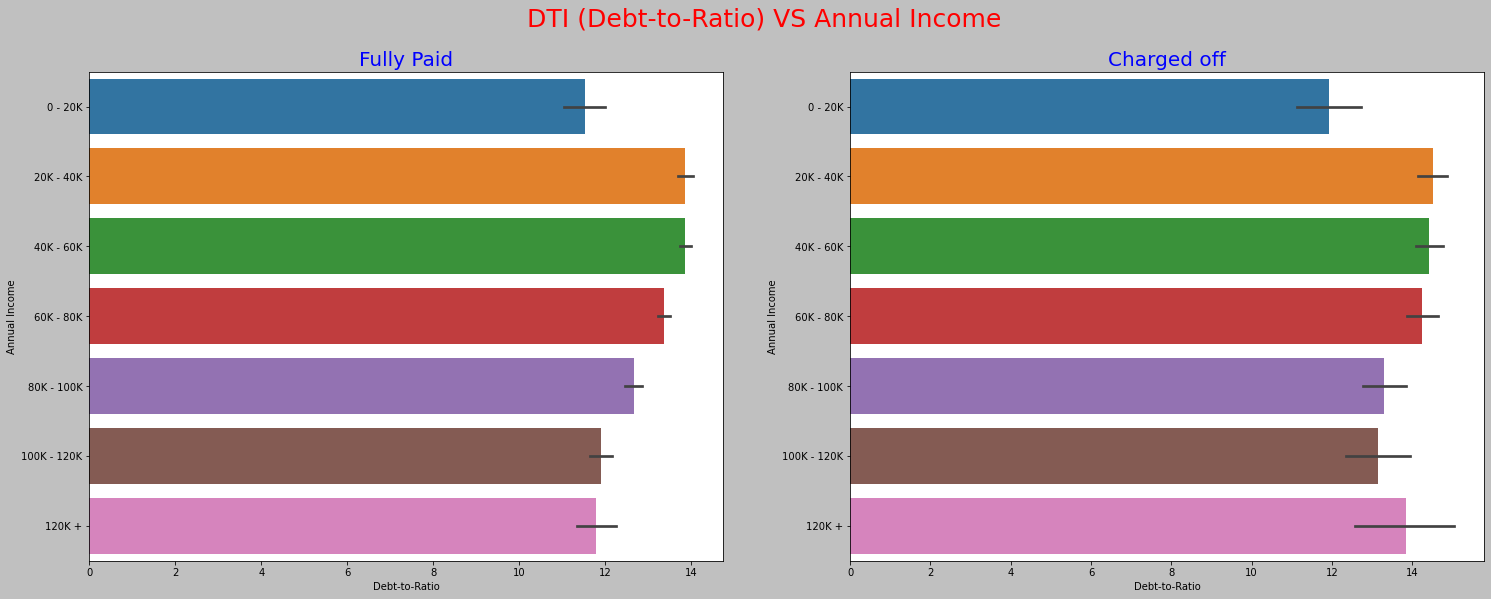

In [434]:
fig, ax = pt.subplots(1,2, figsize=(25,9), facecolor='silver')
pt.suptitle("DTI (Debt-to-Ratio) VS Annual Income", fontsize=25, color='r',fontweight=20)

#Setting title of every axes
ax[0].set_title("Fully Paid", color='b', fontsize=20)
ax[1].set_title("Charged off", color='b', fontsize=20)


#Plotting data for each subplot
g1 = ss.barplot(ax=ax[0], x=paid_df.dti, y=paid_df.annual_income_category)
g1.set_xlabel("Debt-to-Ratio", fontsize=10)
g1.set_ylabel("Annual Income", fontsize=10)

g2 = ss.barplot(ax=ax[1], x=chargedOff_df.dti, y=chargedOff_df.annual_income_category)
g2.set_xlabel("Debt-to-Ratio", fontsize=10)
g2.set_ylabel("Annual Income", fontsize=10)

pt.show()

#When DTI compared with the annual income it clearly show for the annual income who has low income so idealy they should having
#higher DTI, considering with little amount of income many thing to manage but with the higher income like 80K + borrowers 
#category also has a higher dti in charged off which doesnt seems much convincing, so such folks which has a higher income plus
#higher dti can be avoided for lending loan 

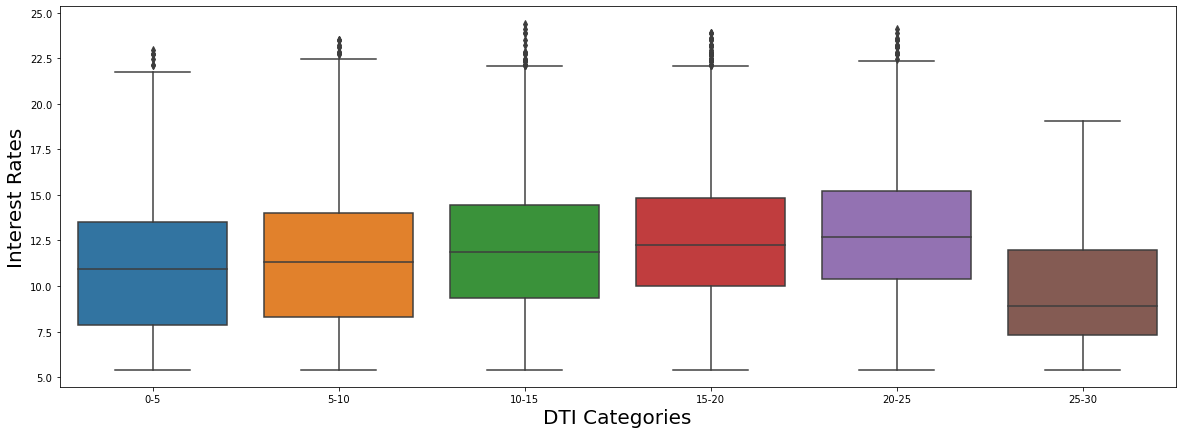

In [465]:
pt.figure(figsize=(20,7))
ss.boxplot(data=loan_df, x=loan_df.dti_category, y=loan_df.int_rate)
pt.xlabel("DTI Categories", fontsize=20)
pt.ylabel("Interest Rates", fontsize=20)
pt.show()

#Below graphs shows as the interest rate is getting increase the DTI is also getting increase but for the last category fo DTI 
#which 25-30 has been dropped, as there are less number of borrowers falls into that category. Apart from that we could state 
#the borrower whose dti is higher will have higher interest rate and if one has lower dti rate will have lower interest rate. 


## MultiVariate Analysis

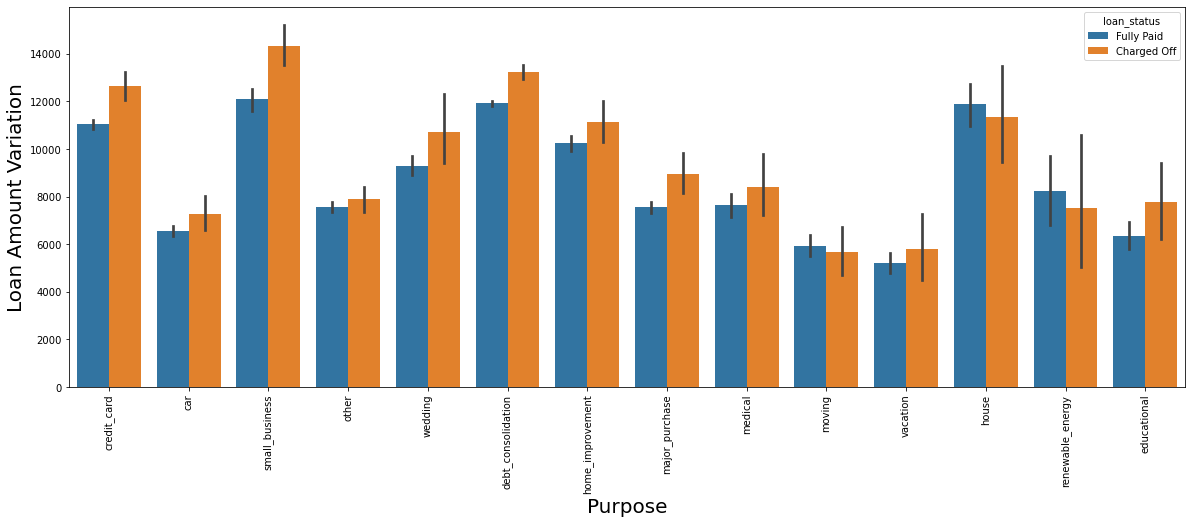

In [481]:
pt.figure(figsize=(20,7))
ss.barplot(data=loan_df[loan_df.loan_status.isin(['Fully Paid','Charged Off'])], x='purpose', y='loan_amnt', hue='loan_status')
pt.xlabel("Purpose", fontsize=20)
pt.ylabel("Loan Amount Variation", fontsize=20)
pt.xticks(rotation=90)
pt.show()4

#Below is the comparison which has been made to see how the borrower is requesting for the loan, after plotting the visuals we
#could see the charged off category has some purpose which are higher than fully paid like the small business, credit card,
#major_purchases, debt_consolidation etc. so for those there are high chances  for making it to defaulters.

#As we saw in the previous visual the same factors were showing high risk of getting charged off  

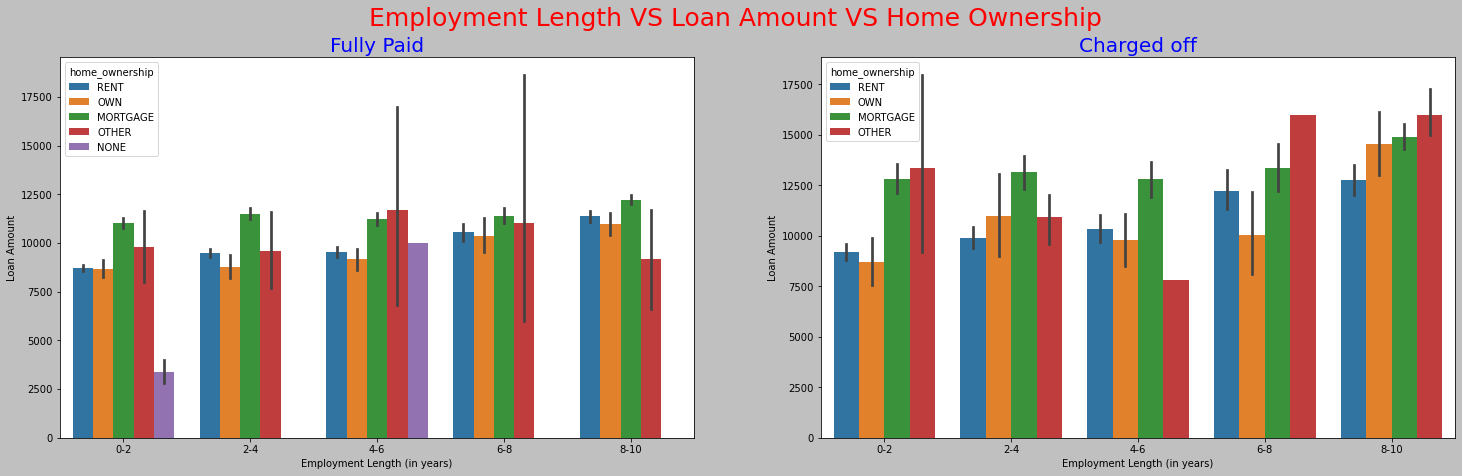

In [468]:
fig, ax = pt.subplots(1,2, figsize=(25,7), facecolor='silver')
pt.suptitle("Employment Length VS Loan Amount VS Home Ownership", fontsize=25, color='r',fontweight=20)

#Setting title of every axes
ax[0].set_title("Fully Paid", color='b', fontsize=20)
ax[1].set_title("Charged off", color='b', fontsize=20)


#Plotting data for each subplot
g1 = ss.barplot(ax=ax[0], x=paid_df.emp_length_cat, y=paid_df.loan_amnt, hue=paid_df.home_ownership)
g1.set_xlabel("Employment Length (in years)", fontsize=10)
g1.set_ylabel("Loan Amount", fontsize=10)

g2 = ss.barplot(ax=ax[1], x=chargedOff_df.emp_length_cat, y=chargedOff_df.loan_amnt, hue = chargedOff_df.home_ownership)
g2.set_xlabel("Employment Length (in years)", fontsize=10)
g2.set_ylabel("Loan Amount", fontsize=10)

pt.show()
#Below visual shows the comparison of Fully Paid and Charged Off category where it looks the numbers are high in ChargedOff category.
#Mortgage rate is high so there is high chance of the borrower making to defaulter or Charged off category.
#Since the borrower is already having the mortgage, Rent  or could be several others personal installment over his head, 
#so there would have been chances to miss out the installments if the borrower's still struggling on financial situation

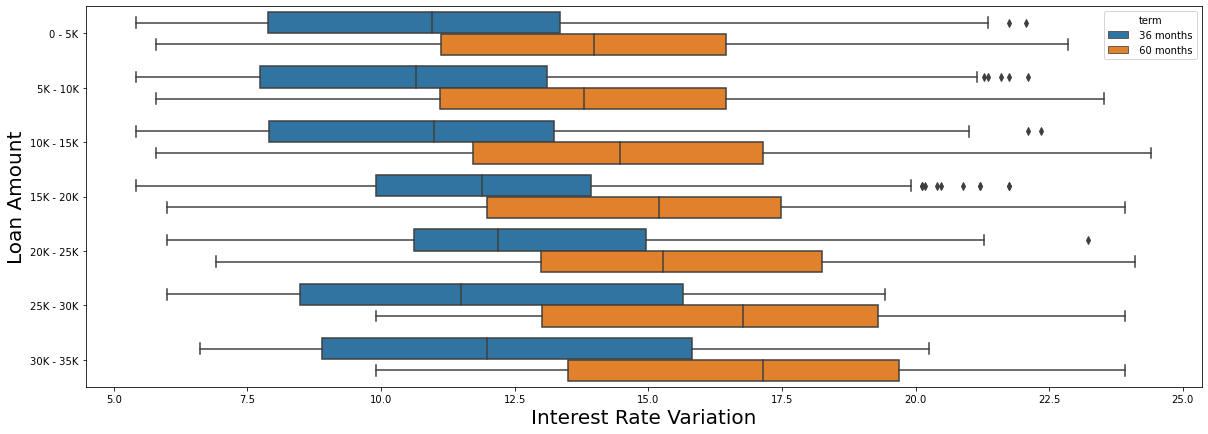

In [390]:
pt.figure(figsize=(20,7))
ss.boxplot(data=loan_df, y=loan_df.loan_amnt_category, x=loan_df.int_rate, hue=loan_df.term)
pt.xlabel("Interest Rate Variation", fontsize=20)
pt.ylabel("Loan Amount", fontsize=20)
pt.show()

#the below graph represtn the comparison of interest rate and loan amount category, as from the below graph we can see the 
#interest rate is getting increase as the loan amount getting increased, so there is a strong positive correlation between these
#2 varibales. (fig below)

#Recommendation would be, if the person is going to apply for the loan for longer period of time it is suggested that borrower should
#have higher income rate and lesser dti since the interest rate would be higher for such loan as a lender we should be making sure that
#borrower is capable of returning the loan.

#As on the previous chart we saw, the loan amount and inerest rate has a strong positive correlation since the loan amount
#is getting increased the inerest rate is also increasing so now the below chart shows if we have the loan for a longer period of
#time it could lead us to have a higher interest rates too

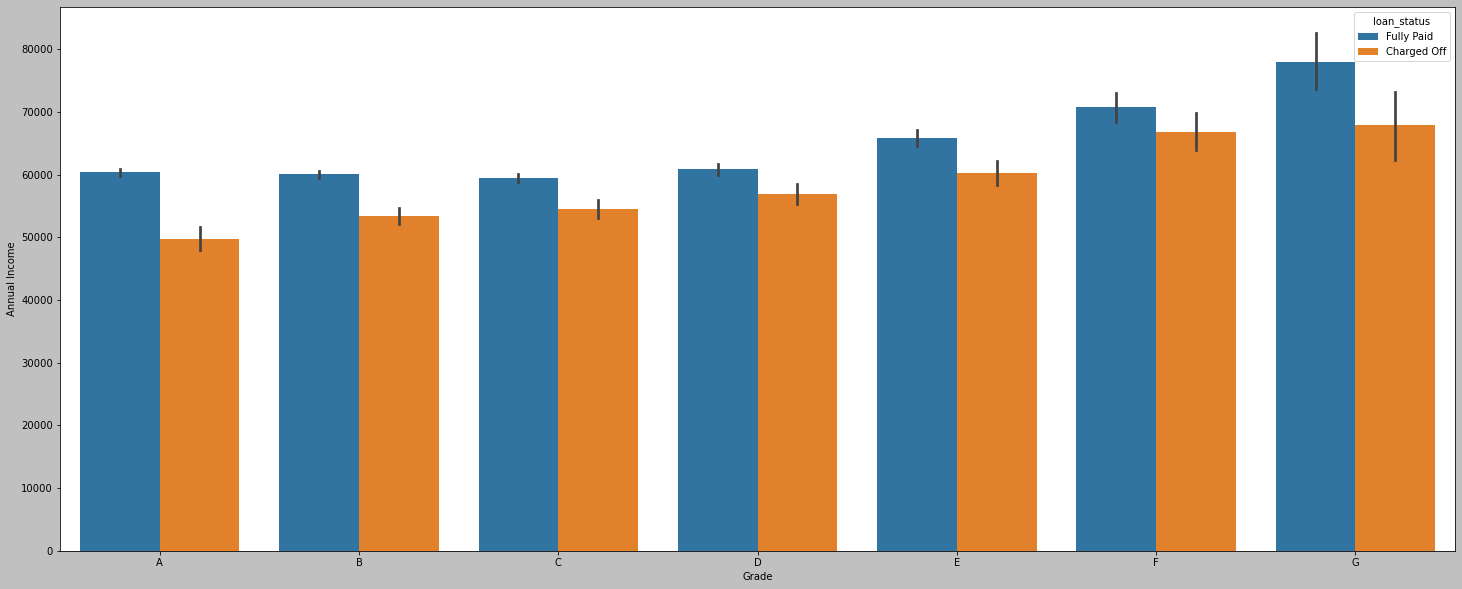

In [473]:
pt.figure(figsize=(25,10), facecolor='silver')
ss.barplot(data=loan_df[loan_df.loan_status.isin(['Fully Paid','Charged Off'])], x='grade', y='annual_inc', hue='loan_status', order='ABCDEFG')
pt.xlabel("Grade", fontsize=10)
pt.ylabel("Annual Income", fontsize=10)

pt.show()

#The comparison of annual inc and grade with loan status clearly shows the charged off category has less annual income which make
#them more likely to get defaulters.

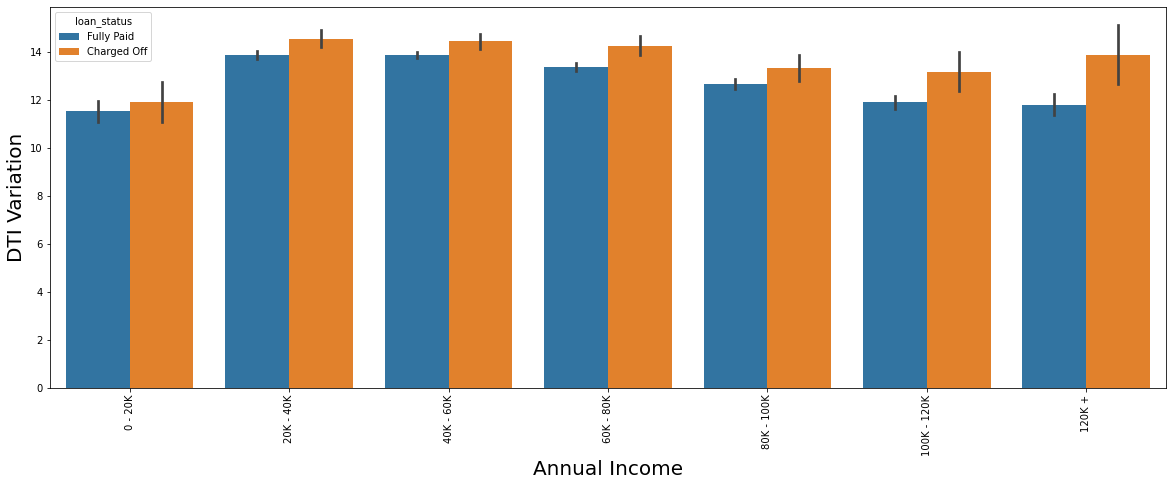

In [482]:
pt.figure(figsize=(20,7))
ss.barplot(data=loan_df[loan_df.loan_status.isin(['Fully Paid','Charged Off'])], x='annual_income_category', y='dti', hue='loan_status')
pt.xlabel("Annual Income", fontsize=20)
pt.ylabel("DTI Variation", fontsize=20)
pt.xticks(rotation=90)
pt.show()

#The below graphs show, the DTI percentage is higher than annual income and most of them falls into Charged Off category 
#which have been seen on the earlier visual too.
#To avoid such user wont be helpful to lender since it will loss in credit, but a thorough check up of background of such user
#can be done before sanctioning the loan

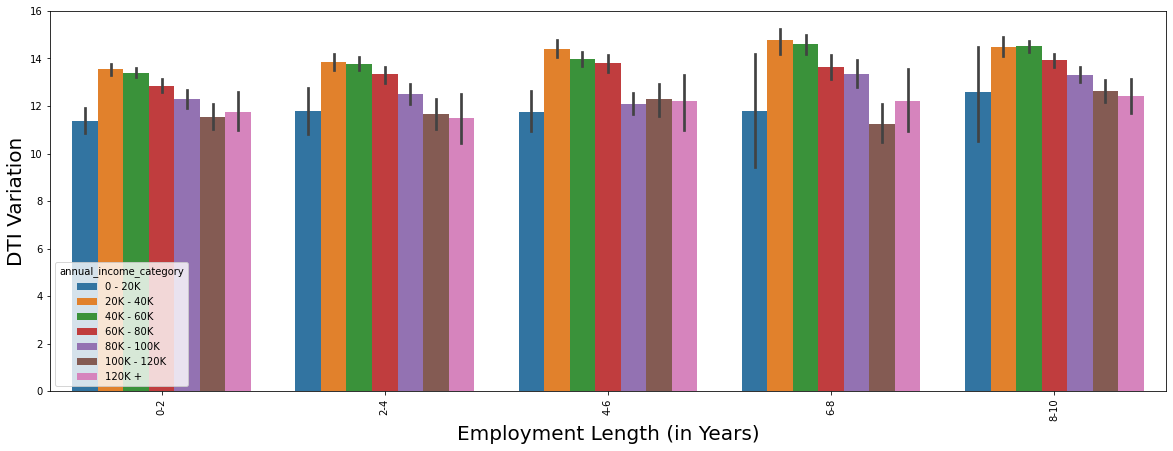

In [484]:
pt.figure(figsize=(20,7))
ss.barplot(data=loan_df[loan_df.loan_status.isin(['Fully Paid','Charged Off'])], x='emp_length_cat', y='dti', hue='annual_income_category')
pt.xlabel("Employment Length (in Years)", fontsize=20)
pt.ylabel("DTI Variation", fontsize=20)
pt.xticks(rotation=90)
pt.show()

#The below visual shows that even with the employment length is higher on each category of the annual income there has been an 
#increased, so we could say that those who has higher income will have higher DTI rate even though they have good amount of employment 
#experience